In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -q pyyaml h5py
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import os
import numpy as np
TrainTest_dict = sio.loadmat('/content/drive/My Drive/NN/Training&Test_set.mat')
X_trainset = TrainTest_dict.get("X_train")
Y_trainset = TrainTest_dict.get("Y_train")
X_testset = TrainTest_dict.get("X_test")
Y_testset = TrainTest_dict.get("Y_test")
print(type(TrainTest_dict), type(X_trainset), type(Y_trainset), len(Y_trainset))

<class 'dict'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> 464


In [3]:
print(X_trainset.shape)

(464, 2943, 3)


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv1D
from keras.layers import MaxPooling1D, Dropout, GlobalMaxPooling1D
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import layer_utils
from keras.utils import plot_model
from keras.optimizers import Adam
tf.__version__

'2.3.0'

Hiperparametros

In [6]:
batch_size = 24                     # Batch size
seq_len = X_trainset[0].shape[0]          # Number of steps
X_input_shape = X_trainset[0].shape
learning_rate = 0.0001
epochs = 100
n_classes = 5
n_channels = 3
activation ='relu'
loss = 'categorical_crossentropy'
X_tr, X_vld, lab_tr, lab_vld = train_test_split(X_trainset, Y_trainset, stratify = Y_trainset, random_state = 123)
#print(X_input_shape, X_trainset.shape[1:])

Construcción del Modelo

In [7]:
def model(input_shape):
  X_input = Input(input_shape, name ='Input')

  #First Multi-Layer: CONV->RELU
  X = Conv1D(filters=18, kernel_size=2, strides=1, padding='same', name ='conv0', activation = activation)(X_input)
  X = MaxPooling1D(pool_size=2, strides=2, padding='same', name ='pool0')(X)

  # Second Multi-Layer: CONV->RELU
  X = Conv1D(filters=36, kernel_size=2, strides=1, padding='same', name ='conv1', activation = activation)(X)
  X = MaxPooling1D(pool_size=2, strides=2, padding='same', name ='pool1')(X)

  # Third Multi-Layer: CONV->RELU
  X = Conv1D(filters=72, kernel_size=2, strides=1, padding='same', name ='conv2', activation = activation)(X)
  X = MaxPooling1D(pool_size=2, strides=2, padding='same', name ='pool2')(X)

  # Fourth Multi-Layer: CONV->RELU
  X = Conv1D(filters=144, kernel_size=2, strides=1, padding='same', name ='conv3', activation = activation)(X)
  X = MaxPooling1D(pool_size=2, strides=2, padding='same', name ='pool3')(X)

  # Fully Connected Layer
  X_Flatten = Flatten(name ='Flatten_0')(X)
  #X_Dense = Dense(X.shape[1]*X.shape[2], activation=activation, name='fully_connected_layer')(X_Flatten)
  #X_Dropout = Dropout(0.5, name ='dropout')(X_Dense)
  X_Dropout = Dropout(0.5, name ='dropout')(X_Flatten)
  # Prediction
  X_Output = Dense(n_classes, activation='softmax',  name ='Classifier')(X_Dropout)

  model = Model(inputs=X_input, outputs=X_Output, name = 'Fault_Classifier')
  adam = Adam(lr=learning_rate)
  model.compile(optimizer=adam, loss=loss, metrics=['acc', 'mse', 'mae'])
  model.summary()
  
  return model

Fault_model = model(X_input_shape)

Model: "Fault_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 2943, 3)]         0         
_________________________________________________________________
conv0 (Conv1D)               (None, 2943, 18)          126       
_________________________________________________________________
pool0 (MaxPooling1D)         (None, 1472, 18)          0         
_________________________________________________________________
conv1 (Conv1D)               (None, 1472, 36)          1332      
_________________________________________________________________
pool1 (MaxPooling1D)         (None, 736, 36)           0         
_________________________________________________________________
conv2 (Conv1D)               (None, 736, 72)           5256      
_________________________________________________________________
pool2 (MaxPooling1D)         (None, 368, 72)      

Entrenamiento del Modelo

In [8]:
history = Fault_model.fit(x = X_trainset, y = Y_trainset, epochs = epochs, batch_size = batch_size)

Epoch 1/100
20/20 [==============================] - 2s 105ms/step - loss: 1.5482 - acc: 0.3836 - mse: 0.1550 - mae: 0.3142
Epoch 2/100
20/20 [==============================] - 2s 106ms/step - loss: 1.3649 - acc: 0.5862 - mse: 0.1383 - mae: 0.2897
Epoch 3/100
20/20 [==============================] - 2s 104ms/step - loss: 1.2462 - acc: 0.5862 - mse: 0.1265 - mae: 0.2551
Epoch 4/100
20/20 [==============================] - 2s 104ms/step - loss: 1.2079 - acc: 0.5862 - mse: 0.1226 - mae: 0.2467
Epoch 5/100
20/20 [==============================] - 2s 105ms/step - loss: 1.1832 - acc: 0.5862 - mse: 0.1203 - mae: 0.2414
Epoch 6/100
20/20 [==============================] - 2s 105ms/step - loss: 1.1549 - acc: 0.5862 - mse: 0.1173 - mae: 0.2400
Epoch 7/100
20/20 [==============================] - 2s 106ms/step - loss: 1.1203 - acc: 0.5905 - mse: 0.1140 - mae: 0.2386
Epoch 8/100
20/20 [==============================] - 2s 105ms/step - loss: 1.0855 - acc: 0.5970 - mse: 0.1109 - mae: 0.2258
Epoch 9/

dict_keys(['loss', 'acc', 'mse', 'mae'])


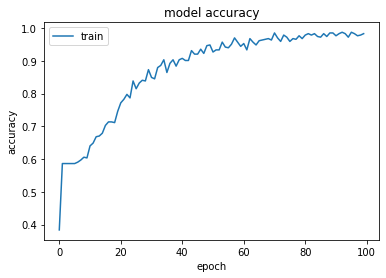

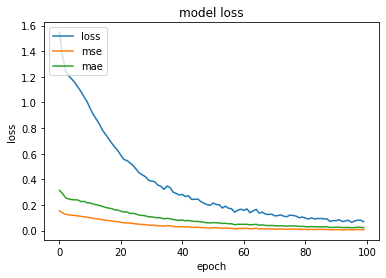

In [10]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse', 'mae'], loc='upper left')
plt.show()

Evaluación del Modelo

In [11]:
preds = Fault_model.evaluate(x = X_testset, y = Y_testset)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 0s 41ms/step - loss: 0.0976 - acc: 0.9663 - mse: 0.0099 - mae: 0.0295

Loss = 0.0975758284330368
Test Accuracy = 0.9663461446762085


Exportación del Modelo

In [27]:
# Scheme model in png
from keras.utils import plot_model
import shutil
plot_model(Fault_model, to_file='./model.png', show_shapes=True,)
# Save the entire model to a HDF5 file.
Fault_model.save('Fault_Classifier_model.h5')
shutil.copy('/content/Fault_Classifier_model.h5', '/content/drive/My Drive/NN')

'/content/drive/My Drive/NN/Fault_Classifier_model.h5'

Predicción de Nuevas muestras

In [30]:
x_1 = X_testset[-1]
y_1 = Y_testset[-1]
print(x_1.shape,y_1)
print(np.round(Fault_model.predict(X_testset)[-1]).shape)

(2943, 3) [1 0 0 0 0]
(5,)
